# ISLP Ch2 Questions

#### Import Data

In [68]:
import plotly as plt
import pandas as pd
import numpy as np
import matplotlib
import seaborn

## Question # 8

#### A: read the data into Python#

In [2]:
college = pd.read_csv(
    '../data/college.csv'
)

#### B: make more useful names

In [3]:
college = college.rename(
    {'Unamed: 0': 'College'},
    axis = 1
)

#### C: Use Describe

In [4]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#### D: plotting

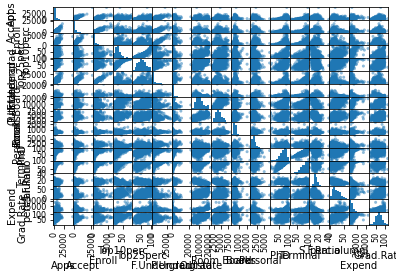

In [5]:
pd.plotting.scatter_matrix(college);

#### E: boxplot

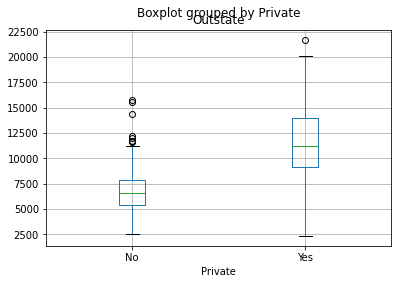

In [6]:
college.boxplot('Outstate', 'Private');

#### F: How many elite?

In [85]:
college['Elite'] = pd.cut(
    college['Top10perc'],
    [0,50,100],
    labels=['No', 'Yes']
)

In [86]:
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

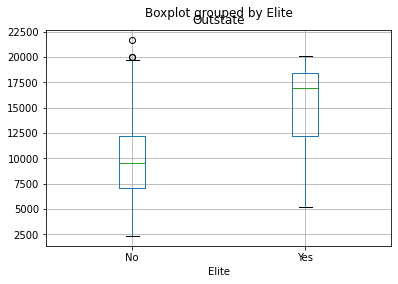

In [87]:
college.boxplot('Outstate', 'Elite'); # @$@ Why is this wrong

#### G: Histogram

In [10]:
# college.plot.hist('Room.Board') 
# # @$@ not running? Taking too long?
# college.plot.hist('Grad.Rate')
# plt.plot

#### H: Continue exploring

## Question # 9

##### load data

In [16]:
auto = pd.read_csv(
    '../data/auto.csv'
)

In [17]:
# remove NAs
auto = pd.DataFrame.dropna(auto)

In [77]:
auto['cylinders'].max()

8

#### A: Which preds are quant? Which qual?

In [21]:
len(auto.columns)

9

In [23]:
auto.head()
# name is Qual.and Orgin is qual
# everything else is quant

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### B: Range 

In [63]:
quant_auto = auto.drop(['name', 'origin', 'horsepower'], axis=1)
quant_auto.head()
print('\nRANGE:')
print(quant_auto.max() - quant_auto.min())


RANGE:
mpg               37.6
cylinders          5.0
displacement     387.0
weight          3527.0
acceleration      16.8
year              12.0
dtype: float64

MEAN:
mpg               23.515869
cylinders          5.458438
displacement     193.532746
weight          2970.261965
acceleration      15.555668
year              75.994962
dtype: float64

STD:
mpg               7.825804
cylinders         1.701577
displacement    104.379583
weight          847.904119
acceleration      2.749995
year              3.690005
dtype: float64


#### C: mean and std?

In [64]:
print('\nMEAN:')
print(quant_auto.mean())
print('\nSTD:')
print(quant_auto.std())


MEAN:
mpg               23.515869
cylinders          5.458438
displacement     193.532746
weight          2970.261965
acceleration      15.555668
year              75.994962
dtype: float64

STD:
mpg               7.825804
cylinders         1.701577
displacement    104.379583
weight          847.904119
acceleration      2.749995
year              3.690005
dtype: float64


#### D: Removing Rows 

In [66]:
filtered_auto_quant = quant_auto.drop([10,85])
print('\nRANGE:')
print(filtered_auto_quant.max() - filtered_auto_quant.min())
print('\nMEAN:')
print(filtered_auto_quant.mean())
print('\nSTD:')
print(filtered_auto_quant.std())


RANGE:
mpg               37.6
cylinders          5.0
displacement     387.0
weight          3527.0
acceleration      16.8
year              12.0
dtype: float64

MEAN:
mpg               23.564051
cylinders          5.445570
displacement     192.656962
weight          2965.901266
acceleration      15.576203
year              76.017722
dtype: float64

STD:
mpg               7.815819
cylinders         1.696203
displacement    103.905655
weight          847.608812
acceleration      2.739621
year              3.683850
dtype: float64


C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


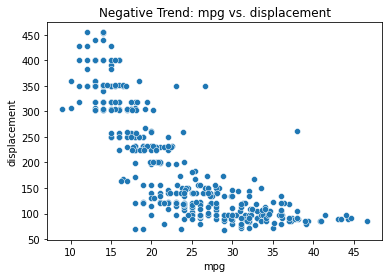

C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


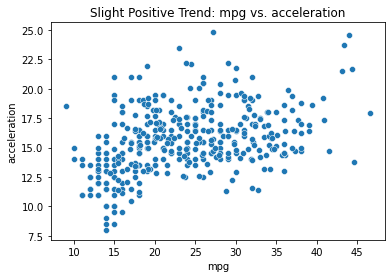

C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


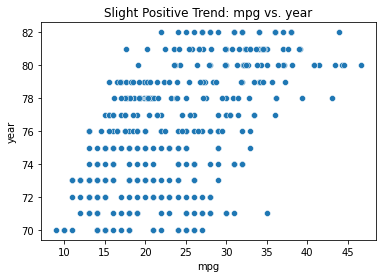

C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dansc\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


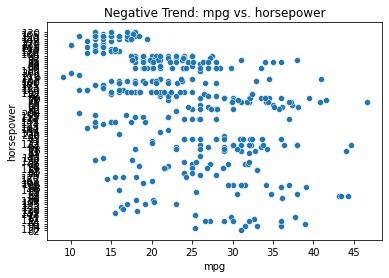

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#mpg vs. displacement
sns.scatterplot(x='mpg', y='displacement', data=auto)
plt.title('Negative Trend: mpg vs. displacement')
plt.show()

# mpg vs. acceleration
sns.scatterplot(x='mpg', y='acceleration', data=auto)
plt.title('Slight Positive Trend: mpg vs. acceleration')
plt.show()

#  mpg vs. year
sns.scatterplot(x='mpg', y='year', data=auto)
plt.title('Slight Positive Trend: mpg vs. year')
plt.show()

#  mpg vs. horsepower
sns.scatterplot(x='mpg', y='horsepower', data=auto)
plt.title('Negative Trend: mpg vs. horsepower')
plt.show()


#### F: Yes all above would be useful in predicting mpg. Each shows a positive or negative trend

## Question # 10

#### A: Load data

In [79]:
Boston = pd.read_csv(
'../data/Boston.csv'
)

#### B: How many rows cols? How what rep?

In [83]:
Boston.shape
# rows represent suburbs
# Col rep features

(506, 15)

In [6]:
# .index is super useful
Boston[Boston['crim'] > .05].index

Index([  4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
       ...
       494, 495, 496, 497, 498, 499, 500, 501, 503, 504],
      dtype='int64', length=432)

In [25]:
lowest_medv = Boston[Boston['medv'] == min(Boston['medv'])]
obs_398 = lowest_medv.iloc[0]
obs_405 = lowest_medv.iloc[1]

#find the means of cols
Boston_means = Boston.mean()

# compare the dif between means and obs
df_obs_398 = Boston_means - obs_398
df_obs_405 = Boston_means - obs_405

In [28]:
# take the avg of the tied for botom and compare to mean
(df_obs_398 + df_obs_405) / 2

Unnamed: 0   -149.000000
crim          -49.522776
zn             11.363636
indus          -6.963221
chas            0.069170
nox            -0.138305
rm              0.716634
age           -31.425099
dis             2.337543
rad           -14.450593
tax          -257.762846
ptratio        -1.744466
black         -34.260968
lstat         -14.131937
medv           17.532806
dtype: float64

In [32]:
len(Boston[Boston['rm'] > 7])
len(Boston[Boston['rm'] > 8])


13